# XXIX. THE BELLMAN-FORD ALGORITHM 
The Bellman-Ford algorithm solves the single-source shortest-path problem. While slower than Dijkstra's algorithm, it accommodates negative edge lengths and is also better suited for distributed implementations. 

Ideally, we'd like to compute the shortest path distance from s to all other destinations v, where as usual, the length of the path is just the sum of the edge costs.  This goal is problematic for input graphs that have a negative cycle. If you allow cycled paths to contain cycles then this isn't even defined. The, in some sense, shortest path length is minus infinity. And if you don't allow cycles, then it's computationally intractable and would be a hard problem. So if you fail to compute shortest paths, then, at least, tell us an excuse. Output a "negative cycle in the input graph" as the reason for your failure to compute shortest path distances.

![Bellman-Ford Algorithm](images/12_Bellman_Ford_Algorithm.png)


### Optimal Substructure

So in the Bellman-Ford algorithm, we're going to have one sub-problem for each possible destination, and each possible restriction on the number of edges in a path. So, for example, suppose we're looking at s and we're looking at destination t. And we think about paths that only have two edges or less. Well, in that case, the shortest path length, subject to that constraint from s to t in the below graph, has the length of four. The bottom path, which has three edges, is not an option, we're only permitting two edges or less in this current sub-problem. Now, if we bump up the edge budget to three, then the corresponding shortest path distance drops from four, to three. Because all of a sudden, we can make use of this three-hop path on the bottom. And again, the point here is that it gives us an unambiguous notion of sub-problem size. The more edges you're allowed to use in your paths, from a source to a given destination, the bigger that sub-problem.


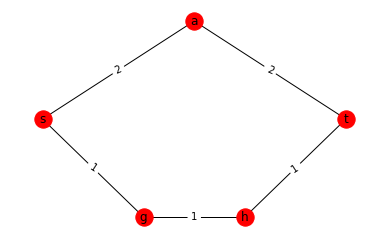

In [5]:
import networkx as nx

g = nx.Graph()
g.add_node('s', pos = (0, 5))
g.add_node('a', pos = (7.5, 10))
g.add_node('g', pos = (5, 0))
g.add_node('h', pos = (10, 0))
g.add_node('t', pos = (15, 5))
g.add_edge('s', 'a', weight = 2)
g.add_edge('a', 't', weight = 2)
g.add_edge('s', 'g', weight = 1)
g.add_edge('g', 'h', weight = 1)
g.add_edge('h', 't', weight = 1)
pos = nx.get_node_attributes(g, 'pos')
weights = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw(g, pos, with_labels = True)

The optimal solution to a sub-problem has to be one of a small number of candidates that are composed in simple ways from optimal solutions to smaller sub-problems. So how do we index a given sub-problem? Well, there's going to be a destination v, that we care about. And, there's going to be a budget on how many edges you're allowed to use in a path from s to v. And we're going to use i to denote that budget.
So for every possible destination v, and so for every possible edge budget, there's going to be a positive integer, 1 or bigger.
Suppose that p is an optimal solution then. Meaning, amongst all paths that start at s, that end at v, and that contain, at most, i edges. Amongst all of those paths, p has the minimum sum of edge cost, the minimum length.

    G = (V, E)
    for every v ∈ V, i ∈ {1, 2, 3, ...} 
        P = shortest s-v path with at most i edges
        
Case I:    <br>
We're going to have our usual trivial case 1, which is that if this path P doesn't bother to use up its full edge budget, that is if it has (i-1) edges or less, well then, naturally, P better be the shortest s-v path that has at most (i-1) edges. <br>
Case II:<br>
So the non-trivial case is when the shortest path with the most i edges from s to v actually uses its full budget, uses all i of its edges. Case two may seem like only one other candidate, but actually case two comprises a number of them, one for each choice of that final hop w, v. Specifically for a given choice of w, that contributes a candidate optimal solution that's the shortest path from s, to that choice of w that uses the most i minus 1 edges, plus that edge wv tacked on.

### The Basic Bellman-Ford Algorithm
![Bellman-Ford Algorithm](images/12_bellmanfordalgo.png)

For each choice of I and V, of course, we just write down in code the formula that we stated in the recurrence. So, case one furnishes one possible candidate. It's always an option to just inheret, the shortest path from S to V that you computed using only, $i-1$ edges.Alternatively from case two, there's also one candidate furnished for each twist of the final hop, so for each edge, that ends at $v$, for each choice $(w, v)$, there's an option of taking a shortest path from $s$ to $w$, that uses only, $i-1$ edges, and tacking on that final edge, $(w, v)$. And as we've discussed, if it just so happens that the input graph $G$ has no negative cycles, then this algorithm will indeed terminate with a correct shortest path from S to all of the destinations. Those answers will be lying in wait for you, in the biggest subproblems, the $A[n-1][v]$'s. 



### Stopping Early
So in general, suppose that some iteration, earlier than the last one, so say with a current index value of j, it just so happens that nothing changes. That every destination v, you just reuse the optimal solution that you recomputed in the previous iteration of the outer 4 loop. Well then if you think about it, what's going to happen in the next iteration? You're going to do exactly the same set of computations, with exactly the same set of inputs, so you're going to get exactly the same set of results. That is, it will be true again in the next iteration that you will just inherit the optimal solutions from the previous one. And that will keep happening over and over again until the rest of time.

So in particular, by the time you get to the n minus 1 iteration of the outer 4 loop, you will have exactly the same set of solution values as you do right now. We've already proven that the results at the end of iteration n minus 1 are correct. Those are the real shortest path distances. If you already have them in your grubby little hands now, well you may as well abort the algorithm and return those as the final correct shortest path distances.


### Detecting Negative Cycles
The presence of negative cost cycles in an input graph is characterized by the behavior of Bellman Ford in an extra iteration. That's why it's easy to extend the basic algorithm. To check negative cycles without affecting the running time.  <br>
G the input graph has no negative cycle, if and only if we don't get any new information from this extra batch of sub-problems. That is if and only if, $A[n][v]$ is exactly the same thing as $A[n-1][v]$ for every possible destination V. Equivalently the input graph does have a negative cost cycle if and only if there exists some sub-problem. There exists some destination $v$, where we see an improvement at $v$ by running the Bellman Ford out for this extra iteration.



### Running Time
<table>
    <caption>&nbsp;&nbsp;&nbsp;&nbsp; Bellman-Ford Algorithm</caption>
    <tr> <td>$\textbf{Operation}$ </td> <td>	$\textbf{Running Time}$ <td> </tr>
    <tr> <td> The Basic Bellman-Ford Algorithm </td>	<td>$O(m n)$ <td> </tr>
    <tr> <td> Bellman-Ford Algorithm with Detecting Negative Cycles </td>	<td>$O(m n)$ <td> </tr>
</table>


### A Space Optimization

The space required by the basic Bellman-Ford algorithm is quadratic in the number of vertices. It is theta of $n^2$.
as soon as we finished one batch of sub-problems for some value of $i$, we've computed $A[i][v]$ for all $v$, we can throw out the results of all of the previous rounds of sub-problems. $A[i-2]$, $A[i-3]$, and so on. All we need is the freshest batch $A[i-1][v]$, the most recent iteration, to correctly proceed. If we do that, the only sub problems we're keeping track of are the ones that we're filling in, in the current round $i$ and we're remember the solutions from the previous round $i - 1$, that means at any given moment in time we're only keeping track of $O(n)$ different sub problems. And this linear space bound is even more impressive than it might appear at first, and that's because if you think about the responsibility of our algorithm in this problem, we have to output a linear number of things, right? We're not just outputting one number. We're outputting n numbers, shortest path distance from s to every possible destination. So the space is really constant per statistic that we have to compute. 

##### Reconstruction Algorithm:

We have this 2-D array capital B, it's indexed by the edge budget $i$ and it's indexed by the destination $v$ and we're supposed to fill in  $B[i][v]$ with a final hop on a shortest path from s to v that uses at most $i$ edges and if no such paths exist then it's just null. For the base case that's when $i$ equals zero and here everybody's predecessor pointer is null. <br>
So the way we're going to fill in the entry $B[i][v]$ is going to depend on which of the candidates won in the competition to be the shortest path for $A[i][v]$. In essence this predecessor pointer $B[i][v]$ is just caching the results of the competition we ran to find the shortest path for $A[i][v]$.<br>
Case one is when you inherit the solution from the last round $A[i-1][v]$. In addition each possible choice for a last hop $(w, v)$ furnishes another candidate for the optimal solution of this round in which your going to pay, you're going to pay the optimal solution to the sub problem $[i - 1][w]$ plus the length of the edge $(w, v)$. <br>
Now notice that, just like the formula that we used to populate the capital $A$ array. The original array. To compute these $B[i][v]$s, all we need to know is information from the last round. Information from the round $i - 1$. So just like with the $A$ array, we can throw out all of the predecessor pointers that date back before yesterday. Before the previous round. Therefore, we again, need only constant space per destination v. To maintain both the shortest path distance from $s$ to $v$ with the most $i$-hops. And the predecessor pointer. We can also compute the predecessorpointers in that same space which allows the reconstruction of shortest paths.  <br>


<table>
    <caption>&nbsp;&nbsp;&nbsp;&nbsp; Bellman-Ford Algorithm </caption>
    <tr> <td>$\textbf{Operation}$ </td> <td>	&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;$\textbf{      Space  }$ <td> </tr>
    <tr> <td> The Basic Bellman-Ford Algorithm </td>	<td>$O(n^2)$<td> </tr>
    <tr> <td> Bellman-Ford Algorithm with Space Optimization</td>	<td>$O(n)$ <td> </tr>
    <tr> <td> Bellman-Ford Algorithm with Space Optimization and Reconstruction Algorithm</td>	<td>$O(n)$ <td> </tr>
</table>


##### To reconstruct a negative cycle
It turns out you can solve the reconstruction problem for negative cost cycles as well, using the Bellman-Ford algorithm and predecessor pointers in exactly the way we've been maintaining them here. I'm not going to talk through all of the details of the solution. I'll leave it to you as a somewhat nontrivial exercise to think through how this really works, but the gist is as follows, so you run the Bellman-Ford algorithm, you maintain the predecessor pointers as on this slide, and if the input graph does have a negative cost cycle, then at some iteration, you will see a cycle amongst the predecessor pointers. Furthermore, that cycle of predecessor pointers must be a negative cost cycle of the original input graph. This means that detecting a negative cost cycle if one exists reduces to checking for a cycle in the predecessor pointers which of course you can solve using depth for a search at every iteration.


In [3]:
import numpy as np
import networkx as nx

def Bellman_Ford_Algorithm_tabular(graph, A, nodes, i_start_vert):
    row, col = A.shape
    for i in range(1, row):
        for v in range(col):
            if v == i_start_vert:
                A[i][v] = 0
                continue
            case_sum_subproblems = []
            case_1 = A[i-1][v]
            for pre in DG.predecessors(nodes[v]):
                w = nodes.index(pre)
                case_sum_subproblems.append(A[i-1][w] + graph.edges[nodes[w], nodes[v]]['weight'])
            if len(case_sum_subproblems) != 0:
                case_2 = min(case_sum_subproblems)
                A[i][v] = min(case_1, case_2)
    
    
def Bellman_Ford_Algorithm_basic(graph, start_vert): 
    nodes = list(graph.nodes)
    A = np.full((len(nodes)-1, len(nodes)), None) 
    i_start_vert = nodes.index(start_vert)
    A[0] = float('inf')
    A[0][i_start_vert] = 0
    Bellman_Ford_Algorithm_tabular(graph, A, nodes, i_start_vert)
    print("A : \n{}".format(A))
    shortest_paths = A[-1]
    for idx in range(len(shortest_paths)):
        print("Shortest path ({}, {}): {}".format(start_vert, nodes[idx], shortest_paths[idx]))
    

DG = nx.DiGraph()
for i,j in zip(['s', 'v', 'w', 'x', 't'],[(0, 5), (5, 10), (10, 10), (7.5, 0), (15, 5)]):
    DG.add_node(i, pos=j)
DG.nodes.data()
DG.add_weighted_edges_from([('s', 'v', 2), ('v', 'w', 2), ('w', 't', 2), ('s', 'x', 4), ('v', 'x', 1), ('x', 't', 4)])
pos = nx.get_node_attributes(DG, 'pos')
weights = nx.get_edge_attributes(DG, 'weight')
nx.draw_networkx_edge_labels(DG, pos, edge_labels = weights)
nx.draw_networkx_labels(DG,pos=pos)
nx.draw(DG, pos, with_labels = True)
start_vert = 's'
Bellman_Ford_Algorithm_basic(DG, start_vert)    
    
   

A : 
[[inf 0 inf inf inf]
 [4 0 inf inf 2]
 [3 0 8 4 2]
 [3 0 6 4 2]]
Shortest path (s, x): 3
Shortest path (s, s): 0
Shortest path (s, t): 6
Shortest path (s, w): 4
Shortest path (s, v): 2


## Bellman Ford Algorithm  using Dynamic Programming with:

    ► Negative edge cost 
    ► Space Optimization
    ► Stopping Early
    ► Negative Cycle Detection
    ► Reconstruction Algorithm in case where negative cycle is not detected

A : 
[[-3 0 -8 -6 0]
 [-3 0 -8 -6 0]]
Bellman Ford Algorithm - Shortest path distance:
(s, x): -3
(s, s): 0
(s, t): -8
(s, w): -6
(s, v): 0
Bellman Ford Algorithm Reconstructing the shortest paths: 
(s, x) : ['s', 'v', 'x']
(s, s) : ['s']
(s, t) : ['s', 'v', 'x', 't']
(s, w) : ['s', 'v', 'x', 't', 'w']
(s, v) : ['s', 'v']


[[-3, 0, -8, -6, 0], ['x', 's', 't', 'w', 'v']]

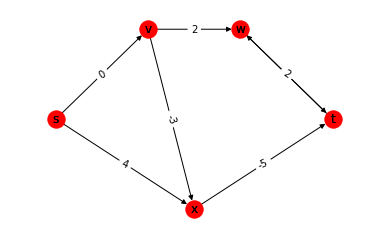

In [102]:
import numpy as np
import networkx as nx

def Bellman_Ford_Algorithm_dynamic(graph, A, B, nodes, i_start_vert):
    row, col = A.shape
    negative_cycle = False
    early_stopped = False
    for i in range(1, col+1):
        if all(A[0] == A[1]):  # stopping early
            early_stopped = True
            break
        A[0] = A[1]
        B[0] = B[1]
        for v in range(col):
            case_sum_subproblems = []
            case_1 = A[0][v]
            case_1_b = B[0][v]
            for pre in graph.predecessors(nodes[v]):
                w = nodes.index(pre)
                #print("i: {}, iw: {}, w: {}, v: {}, sw: {}, wv: {} ".format(i, w,nodes[w], nodes[v], A[0][w] , graph.edges[nodes[w], nodes[v]]['weight']))
                case_sum_subproblems.append([A[0][w] + graph.edges[nodes[w], nodes[v]]['weight'], w])
                #print(case_sum_subproblems)
            if len(case_sum_subproblems) != 0:
                case_2 = min(case_sum_subproblems)
                case_2_b = case_2[1]
                #print("case_1: {} case_2: {}".format(case_1, case_2))
                if case_1 <= case_2[0]:
                    A[1][v] = case_1
                    B[1][v] = case_1_b
                else:
                    A[1][v] = case_2[0]
                    B[1][v] = case_2_b
                #print(A)
                #print(B)
    if any(A[0] != A[1]) and (early_stopped == False) :  # Negative Cycle Detection
        negative_cycle = True
    return negative_cycle
    
    
def reconstruction_algorithm(graph, A, B, nodes, i_start_vert):
    print("Bellman Ford Algorithm Reconstructing the shortest paths: ")
    for v in range(len(nodes)):
        path_node = v
        path = []
        while path_node != i_start_vert:
            path.append(nodes[path_node])
            path_node = B[1][path_node]
        path.append(nodes[i_start_vert])
        print("({}, {}) : {}".format(nodes[i_start_vert], nodes[v], path[::-1]))
 
    
def Bellman_Ford_Algorithm_optimize(graph, start_vert): 
    nodes = list(graph.nodes)
    #A = np.full((len(nodes)-1, len(nodes)), None) 
    A = np.full((2, len(nodes)), None)   # space optimization
    B = np.full((2, len(nodes)), None)   # Reconstruction Algorithm
    i_start_vert = nodes.index(start_vert)
    A[1] = float('inf')
    A[1][i_start_vert] = 0
    B[1][i_start_vert] = i_start_vert
    negative_cycle = Bellman_Ford_Algorithm_dynamic(graph, A, B, nodes, i_start_vert)
    if negative_cycle == False:
        print("A : \n{}".format(A))
        shortest_paths = A[-1]
        print("Bellman Ford Algorithm - Shortest path distance:")
        for idx in range(len(shortest_paths)):
            print("({}, {}): {}".format(start_vert, nodes[idx], shortest_paths[idx]))
        reconstruction_algorithm(graph, A, B, nodes, i_start_vert)
        return [list(shortest_paths), nodes]
    else:
        print("Error: Negative Cycle detected in graph. Bellman-Ford Algorithm does not allow negative cycle.")
        return False
      
    
 

## Negative edge cost + Reconstruction Algorithm
DG = nx.DiGraph()
for i,j in zip(['s', 'v', 'w', 'x', 't'],[(0, 5), (5, 10), (10, 10), (7.5, 0), (15, 5)]):
    DG.add_node(i, pos=j)
DG.nodes.data()
DG.add_weighted_edges_from([('s', 'v', 0), ('v', 'w', 2), ('w', 't', 2), ('t', 'w', 2), ('s', 'x', 4), ('v', 'x', -3), ('x', 't', -5)])
pos = nx.get_node_attributes(DG, 'pos')
weights = nx.get_edge_attributes(DG, 'weight')
nx.draw_networkx_edge_labels(DG, pos, edge_labels = weights)
nx.draw_networkx_labels(DG,pos=pos)
nx.draw(DG, pos, with_labels = True)
start_vert = 's'
Bellman_Ford_Algorithm_optimize(DG, start_vert)    


Error: Negative Cycle detected in graph. Bellman-Ford Algorithm does not allow negative cycle.


False

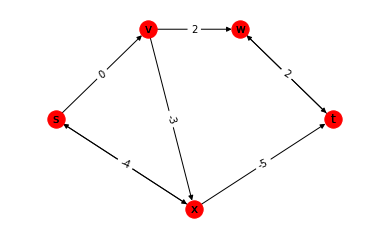

In [103]:
## Negative edge cost + Reconstruction Algorithm
DG = nx.DiGraph()
for i,j in zip(['s', 'v', 'w', 'x', 't'],[(0, 5), (5, 10), (10, 10), (7.5, 0), (15, 5)]):
    DG.add_node(i, pos=j)
DG.nodes.data()
DG.add_weighted_edges_from([('s', 'v', 0), ('v', 'w', 2), ('w', 't', 2), ('t', 'w', 2), ('s', 'x', -4), ('x', 's', -4), ('v', 'x', -3), ('x', 't', -5)])
pos = nx.get_node_attributes(DG, 'pos')
weights = nx.get_edge_attributes(DG, 'weight')
nx.draw_networkx_edge_labels(DG, pos, edge_labels = weights)
nx.draw_networkx_labels(DG,pos=pos)
nx.draw(DG, pos, with_labels = True)
start_vert = 's'
Bellman_Ford_Algorithm_optimize(DG, start_vert)  

A : 
[[3 0 6 4 2]
 [3 0 6 4 2]]
Bellman Ford Algorithm - Shortest path distance:
(s, x): 3
(s, s): 0
(s, t): 6
(s, w): 4
(s, v): 2
Bellman Ford Algorithm Reconstructing the shortest paths: 
(s, x) : ['s', 'v', 'x']
(s, s) : ['s']
(s, t) : ['s', 'v', 'w', 't']
(s, w) : ['s', 'v', 'w']
(s, v) : ['s', 'v']


[[3, 0, 6, 4, 2], ['x', 's', 't', 'w', 'v']]

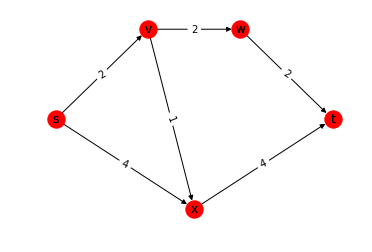

In [104]:
## Space Optimization 
DG = nx.DiGraph()
for i,j in zip(['s', 'v', 'w', 'x', 't'],[(0, 5), (5, 10), (10, 10), (7.5, 0), (15, 5)]):
    DG.add_node(i, pos=j)
DG.nodes.data()
DG.add_weighted_edges_from([('s', 'v', 2), ('v', 'w', 2), ('w', 't', 2), ('s', 'x', 4), ('v', 'x', 1), ('x', 't', 4)])
pos = nx.get_node_attributes(DG, 'pos')
weights = nx.get_edge_attributes(DG, 'weight')
nx.draw_networkx_edge_labels(DG, pos, edge_labels = weights)
nx.draw_networkx_labels(DG,pos=pos)
nx.draw(DG, pos, with_labels = True)
start_vert = 's'
Bellman_Ford_Algorithm_optimize(DG, start_vert)    

A : 
[[1 1 1 3 2 0 2]
 [1 1 1 3 2 0 2]]
Bellman Ford Algorithm - Shortest path distance:
(s, a): 1
(s, d): 1
(s, g): 1
(s, i): 3
(s, h): 2
(s, s): 0
(s, t): 2
Bellman Ford Algorithm Reconstructing the shortest paths: 
(s, a) : ['s', 'a']
(s, d) : ['s', 'd']
(s, g) : ['s', 'g']
(s, i) : ['s', 'g', 'h', 'i']
(s, h) : ['s', 'g', 'h']
(s, s) : ['s']
(s, t) : ['s', 'a', 't']


[[1, 1, 1, 3, 2, 0, 2], ['a', 'd', 'g', 'i', 'h', 's', 't']]

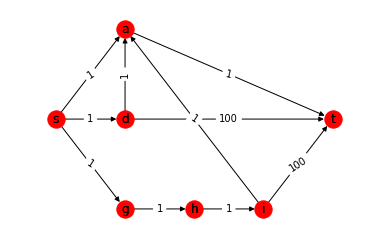

In [105]:
## Stopping Early
DG = nx.DiGraph()
for i,j in zip(['s', 'a', 'd', 'g', 'h', 'i', 't'],[(0, 5), (5, 10), (5, 5), (5, 0), (10, 0), (15, 0), (20, 5)]):
    DG.add_node(i, pos=j)
DG.nodes.data()
DG.add_weighted_edges_from([('s', 'a', 1), ('s', 'd', 1), ('s', 'g', 1), ('a', 't', 1), ('d', 't', 100), ('g', 'h', 1), ('h', 'i', 1), ('i', 't', 100), ('i', 'a', 1), ('d', 'a', 1)])
pos = nx.get_node_attributes(DG, 'pos')
weights = nx.get_edge_attributes(DG, 'weight')
nx.draw_networkx_edge_labels(DG, pos, edge_labels = weights)
nx.draw_networkx_labels(DG,pos=pos)
nx.draw(DG, pos, with_labels = True)
start_vert = 's'
Bellman_Ford_Algorithm_optimize(DG, start_vert)    

Error: Negative Cycle detected in graph. Bellman-Ford Algorithm does not allow negative cycle.


False

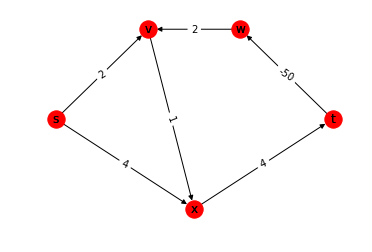

In [106]:
## Negative Cycle Detected
DG = nx.DiGraph()
for i,j in zip(['s', 'v', 'w', 'x', 't'],[(0, 5), (5, 10), (10, 10), (7.5, 0), (15, 5)]):
    DG.add_node(i, pos=j)
DG.nodes.data()
DG.add_weighted_edges_from([('s', 'v', 2), ('w', 'v', 2), ('t', 'w', -50), ('s', 'x', 4), ('v', 'x', 1), ('x', 't', 4)])
pos = nx.get_node_attributes(DG, 'pos')
weights = nx.get_edge_attributes(DG, 'weight')
nx.draw_networkx_edge_labels(DG, pos, edge_labels = weights)
nx.draw_networkx_labels(DG,pos=pos)
nx.draw(DG, pos, with_labels = True)
start_vert = 's'
Bellman_Ford_Algorithm_optimize(DG, start_vert)  

# Internet Routing 

Now as you can imagine, there's a fairly long list of engineering challenges that have to be tackled to move from the basic Bellman-Ford algorithm to a routing protocol that you could conceivably use in practice. So what I'll do here is highlight some of the main issues and what's the high level solution to those issues and with those fixes to the basic Bellman-Ford algorithm, we'll actually have something that's surprisingly close to how modern day Internet protocols, protocols really work. <br>

The first and simplest modification to the algorithm is motivated by the fact that routing in the internet is destination-driven. Given a piece of data floating around in the internet, you really don't care that much where it came, where it came from. All you have to do to accommodate destination driven routing is reverse all of the directions in the Bellman-Ford algorithm. So instead of having a source vertex, S, out of which you compute all shortest paths, you're going to have a destination vertex, T, into which you computeshortest paths from all possible origins. Each vertex, rather than storing a predecessor pointer, the final hop on a shortest path from S to that vertex, it's going to store the first hop on a shortest path to the destination, t. 

So, the second issue we need to address is a little more serious, but it's stillnot too bad. This issue is asynchrony. And what I mean is if you look back at our basic Bellman-Ford algorithm it was synchronous in the following sense. We were careful to structure the outeriteration of the four loop so that all of the sub problems corresponding to value i - 1 gets solved before any of the sub problems with index i. Now when you're talking about the internet and you have different routers, different computers running at different speeds. You have different physical connections with different bandwidth. There's no way you're going to keep people in sync. There's noway you can implement synchronized rounds at the Internet scale. But what's cool is that the Bellman-Ford algorithm is surprisingly robust, to the order in which you solve its subproblems. Really if you solve them in any kind of reasonable order, you're still going to be computing correct shortest paths at the end of the day. So to explain what I mean, let's change the Bellman-Ford algorithm to be push-based rather than pull-based. So the basic Bellman-Ford algorithm is pull based in the following sense. For each other iteration I, and each vertex V, in this iteration, the vertex V in effect asks its neighbors, for their most recent information. So, for there, sub-problem solution values, from the last iteration of the outer four loop. We're going to change it to be push based, which is rather than asking your neighbor for the latest information, whenever you have something new to say, whenever your sub-problem value changes you're just going to go ahead and tell all of your neighbors. You're going to push that information onto your neighbors whether they want it or not. 

So the original Bellman-Ford Algorithm is from the 1950s, and with the modifications we've discussed to this point, we're up to routing protocols that were deployed as late as the 1970s. So if you want to read more you can look at the RIP and RIP2 Internet routing protocols. And if you really want to be nerdy about it you can check out the request for comments related to these protocols. RFC number 1058.
 
##### counting to infinity problem: 
So now, let's talk about the final and most serious problem, which is that stuff in the Internet, nodes, links, etc., is failing all the time. You know its true that we just argued that the asynchronous bellman ford shortest path rounding protocol is guaranteed to converge to correct shortest path. that was assuming that the network was static that no legs were coming up and down. So one particularly simple problem in a presence of failure is what's known as the counting to infinity problem. <br>
So imagine we just have a super simple network verticies s, v, and t by directed arch from s to v and an arc from v to t everything has unit cost and we're doing it routing to the destination t. You might if you want a more realistic example, think about the arcs between S and V as standing in for longer paths that have multiple hops. In any case let's imagine that wesuccessfully computed shortest paths on this basic network so that distance form T to itself is zero, from V to T is one and from S to T is two. Now, again, the issue is that links are failing all the time on the internet. So, at some point, this link from V to T might go down. 
And in an effort to recover connectivity to t, it makes sense for v to ask it'sneighbors, do they have paths to t? And if so, how long are they? So in particular, v will pull s, and s will say, oh yeah, I have a path to t of distance only two. And v says, oh well that's great. I, currently my estimate to t is plus infinity. I can get to s with length one, s says it can get back to t with length two. So that gives me a path of length three to t. 
Now, of course the flaw in this reasoning is that s was depending on v to get to t and now all of a sudden because $(v,t)$ link broke, v circularly is going to use s in its mind to get all the way back to t. So this already illustrates the dangers of naively implementing the asynchronous Bellman Ford algorithm in the presence of link failures. 
![Bellman-Ford Algorithm](images/13_counting_to_infinity_link_failure.png)




***


# XXX. ALL-PAIRS SHORTEST PATHS  (APSP)
In contrast to the single source shortest path problem, there is no distinguished source vertex. And the goal of ALL-PAIRS SHORTEST PATHS  is to compute for every pair of vertices u and v, the length of a shortest path starting at u and ending at v. <br>
Should we be happy with this algorithm that simply runs a single source shortest path algorithm n times? Or do we expect to do better? Well, the answer's going to depend. It's going to depend on two factors. First of all, does the input graph have only non negative edge costs? Or does it more generally also have negative edge costs? The second thing we want to look at is whether the graph is sparse. Meaning m, the number of edges is relatively close to n. Or is it dense, meaning m is relatively close to n^2? 
<table>
    <caption>&nbsp;&nbsp;&nbsp;&nbsp; Bellman-Ford Algorithm</caption>
    <tr> <td>$\textbf{Operation}$ </td>  <td>$\textbf{Description}$ </td><td>	$\textbf{Running Time}$ </td><td>	$\textbf{Running Time (Dense and Sparse graphs)}$ </td> </tr>
    <tr> <td> n * Dijkstra's </td><td> non-negative edge costs </td>	<td>$O(n m logn)$ </td> <td>$O(n^2 logn)$ if m=$O(n)$ </td> </tr>
    <tr> <td> n * Dijkstra's </td><td> </td><td> </td>	<td>$O(n^3 logn)$ if m=$O(n^2)$ </td> </tr>
    <tr> <td> n * Bellman-Ford </td><td> general edge costs </td>	<td>$O(n^2 m)$ </td> <td>$O(n^3)$ if m=$O(n)$ </td> </tr>
    <tr> <td> n * Dijkstra's </td><td> </td><td> </td>	<td>$O(n^4)$ if m=$O(n^2)$ </td> </tr>
</table>



# Floyd-Warshall algorithm
We're going to develop, from scratch, a algorithm for the all pair shortest path problem. Rather than by relying on the aforementioned reduction to the single source version of the problem. <br>

### Optimal Substructure
It can be tricky to apply dynamic programming to graph problems because there isn't really an ordering in the input. You just get this bag of vertices and this bag of edges. And it's often unclear how to define bigger and smaller subproblems.

So the really nice solution in the Bellman-Ford algorithm was to introduce this extra parameter I. I was a budget on the number of edges or roughly equivalently the number of vertices that you are allowed to use in a path. Between the origin and destination for a given subproblem. This naturally induces an ordering on subproblems, the bigger the edge budget, the bigger the subproblem. We're going to do something similar but even a little bit more stringent in the Floyd-Warshall solution. We're again going to restrict the number of vertices that can appear in the middle of the path between a given origin and destination and a subproblem. But more than just the number of the vertices we're allowed to use, we're going to restrict exactly which vertices, the identities of the vertices that the algorithms permitted to use to get from the given origin to the given destination.

So to be a little bit more formal about it, let's just impose some arbitrary ordering on the vertices capital $V$, name the vertices one, two, three, all the way up to $n$. I don't care how. And I'm going to use the notation capital $V^{(k)}$  to denote the prefix of the first $k$ vertices, vertices one through $k$.

All right, so this is actually going to be one of the simpler optimal substructural lemma that we've seen in a while. We're back to the glory days of only two cases. The first is trivial, if the shortest path from I to J using only vertices one through K as intermediaries doesn't even bother to use the vertex K, well then it better well be a shortest path from I to J that uses internal nodes only from one to K-1. Now it's in case two it's going to be apparent what a great idea ordering the vertices looking at prefixes. The vertices is when you're considering the all pairs version of the shortestpath problem. Suppose this path P from I to J does indeed use the vertex K in the middle. Well than we can think of the path P as comprising two sub paths. The first path P1 which starts at I and goes to the vertex K. And then a path P2 which starts at K and goes to the destination J. Now here's what's cool. So on this path P the internal nodes between I and J all lie in one through K.Moreover, this path P remembers cycle free so the vertex K appears exactly once, not more than once. So therefore if we split the path P into these two parts, P1 and P2, internal to P1, strictly in between I and K. There's only vertices between one and K-1. Similarly strictly between K and J and P2, there's only vertices between one through K-1. Thus both of these paths, P1 and P2 can be thought of as feasible solutions to smaller subproblems. Subproblems with an even tighter budget of K minus 1 on the internal nodes that are allowed and these aren't just feasible solutions for smaller subproblems, they're optimal solutions as well. 

### The Floyd-Warshall Algorithm


![Floyd Warshall Algorithm](images/14_Floyd_WarshallAlgorithm.png)



### Running Time
<table>
    <caption>&nbsp;&nbsp;&nbsp;&nbsp; Floyd Warshall Algorithm</caption>
    <tr> <td>$\textbf{Operation}$ </td> <td>	$\textbf{Running Time}$ <td> </tr>
    <tr> <td> Floyd Warshall Algorithm </td>	<td>$O(n^3)$ <td> </tr>
</table>


***


# Johnson's Algorithm

Johnson's algorithm remarkably shows that the same running time we get here for the non-negative edge limit case, $O(n n logn)$, we can get equally well for graphs that have general edge lengths.

Specifically, Johnson's algorithm shows that the alt pair shortest path problem in graphs with general edge lengths reduces to one indication of the Bellman-Ford algorithm followed by an indication of Dijkstra's algorithm. As we know, the Bellman-Ford algorithm runs in $O(mn)$ time. Any indications to Dijkstra's Algorithm is going to be $O(n m logn)$. Putting it together we see that the $n$ indications of Dijkstra dominate just barely. So the overall running time we'll achieve is big $O(n m logn)$. Exactly the same running time we were getting for the non-negative edge length of case.

### A Reweighting Technique
Here is the twist. For each vertex v there's going to be a number $P_v$ associated with that vertex. 
The key idea behind the reweighting technique is to use these end numbers one weight per vertex, $P_v$. To use these end numbers to shift the edge lengths of the graph. I'm going to use $C'$ to denote that these shifted or transformed edge lengths. Here's the exact definition. Consider an arbitrary edge $E$ of this graph $G$. Let's say the edge goes from the tail $U$ to the head $V$. The new length, $C'_e$, is defined as the original length $C_e$. Plus the weights of these edges tail so plus $P_u$, minus the weight associated with these edges head that is minus $P_v$.


    C'e  =  Ce + Pu - Pv


What happens when you just add a fixed amount capital end to every edge of a graph. It doesn't work in the sense that it can change the shortest path. Why can it change the shortest path. Well, different paths have a different number of edges. So if you add some fixed amount to each edge, you change different paths by different amounts. That can screw up the shortest path. If you're lucky and all of the paths between an S and a T have exactly the same number of edges, then you shift them all by exactly the same amount and you preserve the ordering of the paths. 

Well, fix a graph and fix an origin vertex S and a destination vertex T. What we just learned is that when you reweight using these vertex weights, you shift every single ST path by exactly the same amount. The length of every ST path, shortest or otherwise, changes by exactly the quantity $P_S  - P_T$.
We see that under no assumptions whatsoever about what the paths between S and T like, Note reweighting shifts every single path from ST by exactly the same quantity, the difference between PS and PT.



### Johnson's Algorithm

![Johnson's Algorithm](images/15_Johnsons_Algorithm.png)





[0, 1, 2, 3, 4]

Shortest path [head x tail] as row x column: 
[[0 3 2 4 6]
 [inf 0 inf inf 4]
 [inf 1 0 2 4]
 [inf inf inf 0 2]
 [inf inf inf inf 0]]


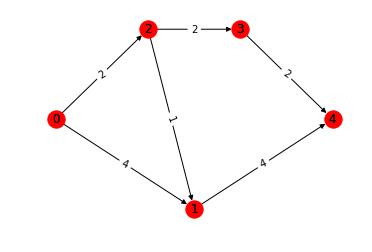

In [73]:
import numpy as np
import networkx as nx

def Floyd_Warshall_APSP_dynamic(graph, A, nodes, edges, i_start_vert):
    n = len(nodes)
    for k in range(1, n):
        for i in range(n):
            for j in range(n):
                case_1 = A[k-1][i][j]
                case_2 = A[k-1][i][k] + A[k-1][k][j] 
                A[k][i][j] = min(case_1, case_2)
    
    
def Floyd_Warshall_Algorithm(graph, start_vert): 
    nodes = list(graph.nodes)
    edges = graph.edges.data()
    print(nodes)
    A = np.full((len(nodes), len(nodes), len(nodes)), None) 
    i_start_vert = nodes.index(start_vert)
    A[0] = float('inf')
    for diagonal in range(len(nodes)):
        A[0][diagonal][diagonal] = 0
    for edge in edges:
        A[0][edge[0]][edge[1]] = edge[2]['weight']
    Floyd_Warshall_APSP_dynamic(graph, A, nodes, edges, i_start_vert)
    #print("A : \n{}".format(A))
    print("\nShortest path [head x tail] as row x column: \n{}".format(A[-1]))
    

DG = nx.DiGraph()
for i,j in zip([0, 2, 3, 1, 4],[(0, 5), (5, 10), (10, 10), (7.5, 0), (15, 5)]):
    DG.add_node(i, pos=j)
DG.nodes.data()
DG.add_weighted_edges_from([(0, 2, 2), (2, 3, 2), (3, 4, 2), (0, 1, 4), (2, 1, 1), (1, 4, 4)])
pos = nx.get_node_attributes(DG, 'pos')
weights = nx.get_edge_attributes(DG, 'weight')
nx.draw_networkx_edge_labels(DG, pos, edge_labels = weights)
nx.draw_networkx_labels(DG,pos=pos)
nx.draw(DG, pos, with_labels = True)
start_vert = 0
Floyd_Warshall_Algorithm(DG, start_vert)    
    
   

[0, 1, 2, 3, 4]

Shortest path [head x tail] as row x column: 
[[0 -3 0 -6 -8]
 [inf 0 inf -3 -5]
 [inf -3 0 -6 -8]
 [inf inf inf 0 2]
 [inf inf inf 2 0]]


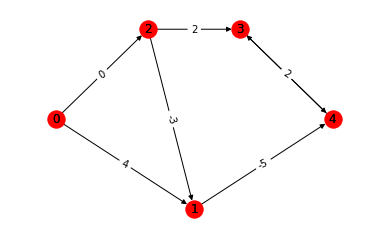

In [74]:
# Negative edges
DG = nx.DiGraph()
for i,j in zip([0, 2, 3, 1, 4],[(0, 5), (5, 10), (10, 10), (7.5, 0), (15, 5)]):
    DG.add_node(i, pos=j)
DG.nodes.data()
DG.add_weighted_edges_from([(0, 2, 0), (2, 3, 2), (3, 4, 2), (4, 3, 2), (0, 1, 4), (2, 1, -3), (1, 4, -5)])
pos = nx.get_node_attributes(DG, 'pos')
weights = nx.get_edge_attributes(DG, 'weight')
nx.draw_networkx_edge_labels(DG, pos, edge_labels = weights)
nx.draw_networkx_labels(DG,pos=pos)
nx.draw(DG, pos, with_labels = True)
start_vert = 0
Floyd_Warshall_Algorithm(DG, start_vert)    

A : 
[[0 -8 -6 0 0 -3]
 [0 -8 -6 0 0 -3]]
Bellman Ford Algorithm - Shortest path distance:
(Johnsons, s): 0
(Johnsons, t): -8
(Johnsons, w): -6
(Johnsons, v): 0
(Johnsons, Johnsons): 0
(Johnsons, x): -3
Bellman Ford Algorithm Reconstructing the shortest paths: 
(Johnsons, s) : ['Johnsons', 's']
(Johnsons, t) : ['Johnsons', 'v', 'x', 't']
(Johnsons, w) : ['Johnsons', 'v', 'x', 't', 'w']
(Johnsons, v) : ['Johnsons', 'v']
(Johnsons, Johnsons) : ['Johnsons']
(Johnsons, x) : ['Johnsons', 'v', 'x']

Running Dijkstra on all paths

Johnson's Algorithm : Shortest path format head : [tail: shortest path values] : 

x  :  {'x': 0, 's': inf, 't': -5, 'w': -3, 'v': inf}
s  :  {'x': -3, 's': 0, 't': -8, 'w': -6, 'v': 0}
t  :  {'x': inf, 's': inf, 't': 0, 'w': 2, 'v': inf}
w  :  {'x': inf, 's': inf, 't': 2, 'w': 0, 'v': inf}
v  :  {'x': -3, 's': inf, 't': -8, 'w': -6, 'v': 0}


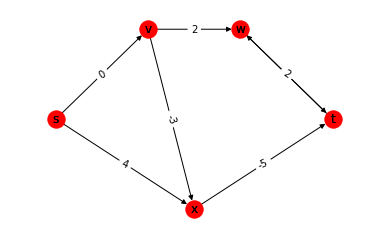

In [139]:
%matplotlib inline
import networkx as nx
import heapq
import numpy as np


def djikstra_heap(DG, source):
    #Heap implementation which does the following
    #
    # 1. For vertices in X, find all edges originating from them to all vertices not in X
    # 2. Keep track of minimum value of len(w) + lwv
    # 3. Return w, v and lwv
    X = [source]
    minHeap = []
    heapq.heappush(minHeap, [0, source])
    all_nodes = list(DG.nodes)
    for node in all_nodes:
        DG.nodes[node]['shortest_dist'] = float('inf')
    while len(minHeap) != 0:
        w = heapq.heappop(minHeap)
        X.append(w[1])
        DG.nodes[w[1]]['shortest_dist'] = w[0]
        for edge in list(DG.edges):
            if (edge[0] == w[1]) and (edge[1] not in X):  # node that has just been popped should be the tail
                dji_greedy = w[0] + DG.edges[edge[0], edge[1]]['weight'] #djikstra's greedy criterion
                doublenp = np.array(minHeap)
                singlenp = []
                if len(doublenp) == 0:
                    heapq.heappush(minHeap, [dji_greedy, edge[1]])
                    continue
                else:
                    singlenp = doublenp[:,1]
                if edge[1] not in singlenp:
                    heapq.heappush(minHeap, [dji_greedy, edge[1]])
                else:
                    dest_idx = np.where(singlenp == edge[1])
                    if dji_greedy < int(doublenp[dest_idx][0][0]):
                        minHeap[dest_idx[0][0]] = minHeap[0]
                        heapq.heapify(minHeap)
                        heapq.heappop(minHeap)
                        heapq.heappush(minHeap, [dji_greedy, edge[1]])
    shortest_path_dict = {}
    for node in all_nodes:
        shortest_path_dict[node] = DG.nodes[node]['shortest_dist']
    return shortest_path_dict

        
    
def Johnsons_Algorithm(graph, start_vert): 
    nodes = list(graph.nodes)
    graph_prime = graph.copy(as_view=False)
    graph_prime.add_node('Johnsons')
    j_edges_add = []
    for node in nodes:
        j_edges_add.append(('Johnsons', node, 0))
    graph_prime.add_weighted_edges_from(j_edges_add)
    j_start_vert = 'Johnsons'
    bellman_Pv = Bellman_Ford_Algorithm_optimize(graph_prime, j_start_vert)    
    graph_prime_dij = graph.copy(as_view=False)
    for e in graph_prime_dij.edges:
        Pu = bellman_Pv[0][bellman_Pv[1].index(e[0])]
        Pv = bellman_Pv[0][bellman_Pv[1].index(e[1])]
        graph_prime_dij[e[0]][e[1]]['weight'] = graph[e[0]][e[1]]['weight'] + Pu - Pv
    apsp = {}
    for node in nodes:
        shortest_dict = djikstra_heap(graph_prime_dij, node)
        apsp[node] = shortest_dict
    print("\nRunning Dijkstra on all paths")
    print("\nJohnson\'s Algorithm : Shortest path format head : [tail: shortest path values] : \n")
    for source, dest in apsp.items():
        for d in dest:
            Pu = bellman_Pv[0][bellman_Pv[1].index(source)]
            Pv = bellman_Pv[0][bellman_Pv[1].index(d)]
            dest[d] -= (Pu - Pv) 
        print("{}  :  {}".format(source, dest))
        
        

DG = nx.DiGraph()
for i,j in zip(['s', 'v', 'w', 'x', 't'],[(0, 5), (5, 10), (10, 10), (7.5, 0), (15, 5)]):
    DG.add_node(i, pos=j)
DG.nodes.data()
DG.add_weighted_edges_from([('s', 'v', 0), ('v', 'w', 2), ('w', 't', 2), ('t', 'w', 2), ('s', 'x', 4), ('v', 'x', -3), ('x', 't', -5)])
pos = nx.get_node_attributes(DG, 'pos')
weights = nx.get_edge_attributes(DG, 'weight')
nx.draw_networkx_edge_labels(DG, pos, edge_labels = weights)
nx.draw_networkx_labels(DG,pos=pos)
nx.draw(DG, pos, with_labels = True)
start_vert = 's'
Johnsons_Algorithm(DG, start_vert)            
